In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
inspector = inspect(engine)
session = Session(engine)

In [12]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [14]:
all_data = engine.execute('SELECT * FROM station').fetchall()
all_data

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
# Get a list of column names and types
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_12 = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_data = pd.DataFrame(last_12)
last_12_data.set_index('date')
clean_last_12 = last_12_data.groupby('date').sum()
clean_last_12.head()

,prcp
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10


In [18]:
clean_last_12 = last_12_data.dropna(axis=0, how='any')
precip = clean_last_12['prcp'].max()
print(f"The average precipitation is: {precip} inches")

The average precipitation is: 6.7 inches


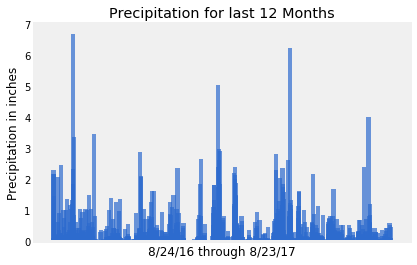

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
# Define labels
plt.title("Precipitation for last 12 Months")
plt.xlabel("8/24/16 through 8/23/17")
plt.ylabel("Precipitation in inches")
plt.grid(False)


# Define X and Y values
y = clean_last_12["prcp"].tolist()
x = np.arange(0, len(clean_last_12.index.tolist()), 1)

#Plot

plot = plt.bar(x, y, width=25, color="#2d6bce", alpha=.7, align="edge")
plt.tick_params(labelbottom=False)


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats = clean_last_12.describe()
print(stats)

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
all_stations = session.query(func.count(Station.station)).first()
all_stations

(9)

In [22]:
# List the stations and the counts in descending order.
data = engine.execute('SELECT * FROM measurement').fetchall()
data

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [23]:
data_df = pd.DataFrame(data)
clean_data_df = data_df.dropna(axis=0, how='any')

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?

most_active = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_d = pd.DataFrame(most_active, columns=['Station', 'Count'])
most_active = active_d['Station'][0]
count = active_d['Count'][0]

In [25]:
print(f"The most active station is: {most_active}")
print(f"Number of Observations: {count}")

The most active station is: USC00519281
Number of Observations: 2772


In [26]:
last_12_temp = session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.station == (most_active)).order_by(Measurement.date).all()
temp_df = pd.DataFrame(last_12_temp)
temp_df.head(3)
temp_df1 = temp_df.rename(index=str, columns={"tobs": "temps"})
temp_df1.head()

,station,temps
0,USC00519281,70.0
1,USC00519281,62.0
2,USC00519281,74.0
3,USC00519281,75.0
4,USC00519281,74.0


In [27]:
#Set temps to print
high = int(temp_df1['temps'].max())
low = int(temp_df1['temps'].min())
mean = int(temp_df1['temps'].mean())

print(f"Temps at Station: USC00519281")
print(f"Date Range: 8/24/16 through 8/23/17")
print(f"High Temp: {high}")
print(f"Low Temp: {low}")
print(f"Avg Temp: {mean}")


Temps at Station: USC00519281
Date Range: 8/24/16 through 8/23/17
High Temp: 85
Low Temp: 54
Avg Temp: 71


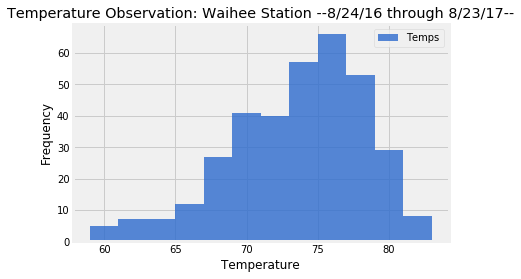

In [55]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

#Waihee 837.5 has the highest number of observations
most_active_station

waihee_temps = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()


temperatures = [temp[0] for temp in waihee_temps]

plt.hist(temperatures, bins=12, color="#2d6bce", alpha=.8)
plt.title("Temperature Observation: Waihee Station --8/24/16 through 8/23/17--")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
labels = ['Temps']
plt.legend(labels)